# Regrassão Linear Simples

## Objetivos

### Depois de concluir este laboratório, você será capaz de:

#### Use o scikit-learn para implementar regressão linear simples

#### Crie um modelo, treine-o, teste-o e use o modelo

### Importando pacotes necessários

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np

%matplotlib inline

## Baixando dados

#### Para fazer download dos dados, usaremos !wget para fazer download deles do IBM Object Storage.

In [2]:
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


## Compreendendo os dados

###### FuelConsumption.csv:

Baixamos um conjunto de dados de consumo de combustível, FuelConsumption.csv, que contém classificações de consumo de combustível específicas do modelo e emissões estimadas de dióxido de carbono para veículos leves novos para venda no varejo no Canadá. Fonte do conjunto de dados

MODELYEAR e.g. 2014

MAKE e.g. Acura

MODEL e.g. ILX

VEHICLE CLASS e.g. SUV

ENGINE SIZE e.g. 4.7

CYLINDERS e.g 6

TRANSMISSION e.g. A6

FUEL CONSUMPTION in CITY(L/100 km) e.g. 9.9

FUEL CONSUMPTION in HWY (L/100 km) e.g. 8.9

FUEL CONSUMPTION COMB (L/100 km) e.g. 9.2

CO2 EMISSIONS (g/km) e.g. 182 --> low --> 0

## Lendo os dados

In [3]:
df = pd.read_csv("FuelConsumption.csv")

# Verificar o dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Exploração de dados

#### Fazer uma exploração descritiva de nossos dados.

In [4]:
# sumarizar os dados
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


#### Selecionar alguns recursos para explorar mais.

In [5]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


#### Plotar cada um desses recursos:




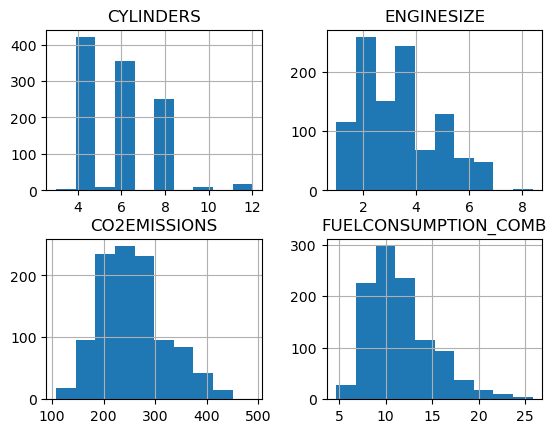

In [6]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

#### Representar graficamente cada uma dessas características em relação à Emissão, para ver quão linear é sua relação:

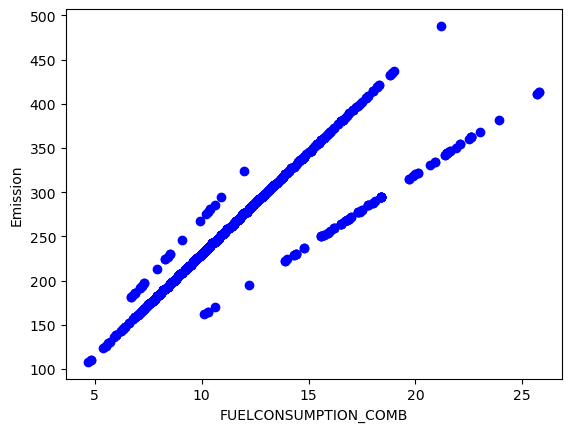

In [7]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('Emission')
plt.show()

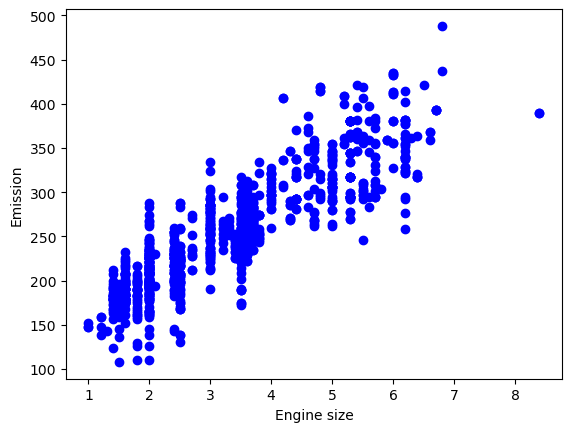

In [8]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('Engine size')
plt.ylabel('Emission')
plt.show()

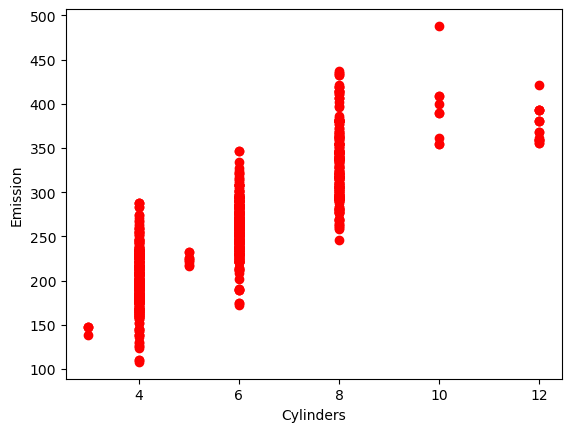

In [9]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='red')
plt.xlabel('Cylinders')
plt.ylabel('Emission')
plt.show()

## Criando conjunto de dados de treinamento e teste

A divisão de treinamento/teste envolve a divisão do conjunto de dados em conjuntos de treinamento e teste que são mutuamente exclusivos. Depois disso, você treina com o conjunto de treinamento e testa com o conjunto de testes. Isso fornecerá uma avaliação mais precisa da precisão fora da amostra porque o conjunto de dados de teste não faz parte do conjunto de dados usado para treinar o modelo. Portanto, isso nos dá uma melhor compreensão de quão bem nosso modelo generaliza em novos dados.

Isso significa que sabemos o resultado de cada ponto de dados no conjunto de dados de teste, o que torna ótimo o teste! Como esses dados não foram usados ​​para treinar o modelo, o modelo não tem conhecimento do resultado desses pontos de dados. Então, em essência, é realmente um teste fora da amostra.

Vamos dividir nosso conjunto de dados em conjuntos de treinamento e teste. 80% de todo o conjunto de dados será usado para treinamento e 20% para teste. Criamos uma máscara para selecionar linhas aleatórias usando a função np.random.rand():

In [11]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [15]:
train

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
...,...,...,...,...
1061,3.2,6,11.2,258
1062,3.0,6,11.8,271
1063,3.2,6,11.5,264
1064,3.0,6,11.8,271


## Modelo de regressão simples

A regressão linear ajusta um modelo linear com coeficientes B = (B1, ..., Bn) para minimizar a 'soma residual dos quadrados' entre o valor real y no conjunto de dados e o valor previsto yhat usando aproximação linear.

### Treinar distribuição de dados

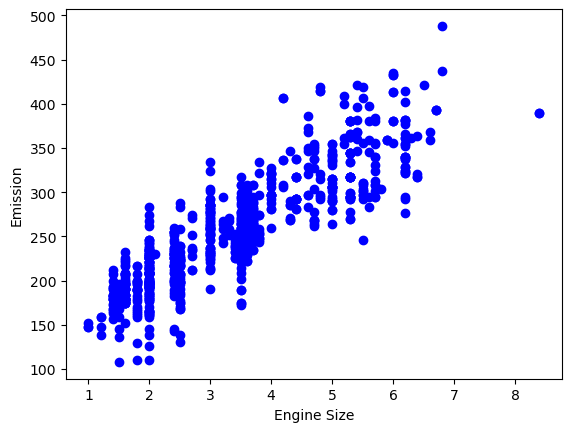

In [16]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.xlabel('Engine Size')
plt.ylabel('Emission')
plt.show()

## Modelagem

Usando o pacote sklearn para modelar dados.

In [20]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)

# Os Coeficientes
print('Coeficiente: ', regr.coef_)
print('Intercept: ', regr.intercept_)

Coeficiente:  [[38.74117607]]
Intercept:  [125.96052593]


Conforme mencionado anteriormente, Coeficiente e Interceptação na regressão linear simples são os parâmetros da linha de ajuste. Dado que se trata de uma regressão linear simples, com apenas 2 parâmetros, e sabendo que os parâmetros são o intercepto e a inclinação da reta, o sklearn pode estimá-los diretamente a partir dos nossos dados. Observe que todos os dados devem estar disponíveis para percorrer e calcular os parâmetros.

## Plotar saídas

Traçar a linha de ajuste sobre os dados:

Text(0, 0.5, 'Emission')

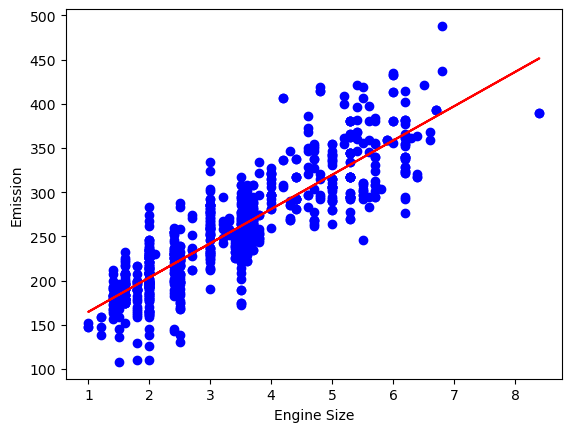

In [22]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], 'r')
plt.xlabel('Engine Size')
plt.ylabel('Emission')

## Avaliação

Comparamos os valores reais e os valores previstos para calcular a precisão de um modelo de regressão. As métricas de avaliação desempenham um papel fundamental no desenvolvimento de um modelo, pois fornecem insights sobre áreas que necessitam de melhorias.

Existem diferentes métricas de avaliação de modelo, vamos usar o MSE aqui para calcular a precisão do nosso modelo com base no conjunto de teste:

    Erro Médio Absoluto: É a média do valor absoluto dos erros. Esta é a métrica mais fácil de entender, pois é apenas um erro médio.

    Erro quadrático médio (MSE): O erro quadrático médio (MSE) é a média do erro quadrático. É mais popular que o erro médio absoluto porque o foco é mais voltado para erros grandes. Isso se deve ao fato de o termo quadrado aumentar exponencialmente os erros maiores em comparação aos menores.

    Erro quadrático médio raiz (RMSE).

    R-quadrado não é um erro, mas sim uma métrica popular para medir o desempenho do seu modelo de regressão. Representa o quão próximos os pontos de dados estão da linha de regressão ajustada. Quanto maior o valor de R ao quadrado, melhor o modelo se ajusta aos seus dados. A melhor pontuação possível é 1,0 e pode ser negativa (porque o modelo pode ser arbitrariamente pior).

In [23]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 22.13
Residual sum of squares (MSE): 910.18
R2-score: 0.77


## Exercício

Quais são as métricas de avaliação se treinarmos um modelo de regressão usando o recurso FUELCONSUMPTION_COMB.

Comece selecionando FUELCONSUMPTION_COMB como os dados train_x do dataframe do trem e, em seguida, selecione FUELCONSUMPTION_COMB como os dados test_x do dataframe de teste

In [24]:
train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB']])

test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB']])

Agora treine um modelo de regressão linear usando o train_x que você criou e o train_y criado anteriormente

In [26]:
regr = linear_model.LinearRegression()

regr.fit(train_x, train_y)

LinearRegression()

Encontre as previsões usando a função de previsão do modelo e os dados test_x

In [28]:
predictions = regr.predict(test_y)

Por fim, use as previsões e os dados test_y e encontre o valor do erro médio absoluto usando as funções np.absolute e np.mean como feito anteriormente

In [29]:
print("Mean Absolute Error: %.2f" % np.mean(np.absolute(predictions - test_y)))

Mean Absolute Error: 3869.47
